In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jaxgym.stemoverfocus import (compute_scan_grid_rays_and_intensities, 
                                  do_shifted_sum)
import json
import jaxgym.components as comp

%matplotlib widget
jax.config.update('jax_platform_name', 'cpu')

/home/dl277493/JaxTemGym/src/jaxgym/ode.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange, tqdm


Load the Data

In [2]:
fourdstem_array = np.load('fourdstem_array.npy')
params_dict = json.load(open('params.json'))

semi_conv = params_dict['semi_conv']
defocus = params_dict['defocus']
camera_length = params_dict['camera_length']
scan_shape = params_dict['scan_shape'] #YX
det_shape = params_dict['det_shape'] #YX
scan_step = params_dict['scan_step'] #YX
det_px_size = params_dict['det_px_size'] #YX
scan_rotation = params_dict['scan_rotation']
descan_error = params_dict['descan_error']

Make the model

In [3]:
#Create ray input z plane
crossover_z = jnp.zeros((1))

PointSource = comp.PointSource(z=crossover_z, semi_conv=semi_conv)
ScanGrid = comp.ScanGrid(z=jnp.array([params_dict['defocus']]), 
                         scan_step=params_dict['scan_step'], 
                         scan_shape=params_dict['scan_shape'], 
                         scan_rotation=params_dict['scan_rotation'])

Descanner = comp.Descanner(z=jnp.array([params_dict['defocus']]), 
                           descan_error=params_dict['descan_error'], 
                           scan_pos_x=0., 
                           scan_pos_y=0.)

Detector = comp.Detector(z=jnp.array([params_dict['camera_length']]), 
                         det_shape=params_dict['det_shape'], 
                         det_pixel_size=params_dict['det_px_size'])

model = [PointSource, ScanGrid, Descanner, Detector]

In [4]:
shifted_sum = np.zeros(ScanGrid.scan_shape, dtype=np.complex64)

Get the backprojected sample pixels and detector intensities on the scan grid

In [5]:
sample_px_ys, sample_px_xs, detector_intensities = compute_scan_grid_rays_and_intensities(model, fourdstem_array)

Scan Y:   0%|          | 0/10918 [00:00<?, ?it/s]

In [9]:
# flat_sample_px_ys = np.array(sample_px_ys).flatten()
# flat_sample_px_xs = np.array(sample_px_xs).flatten()
# flat_detector_intensities = np.array(detector_intensities).flatten()

shifted_sum_image = np.zeros(scan_shape, dtype=np.complex64)
shifted_sum = do_shifted_sum(shifted_sum_image, sample_px_ys, sample_px_xs, detector_intensities)

NumbaValueError: unsupported PEP 3118 format '=i'

Text(0.5, 1.0, 'Shifted Sum Image')

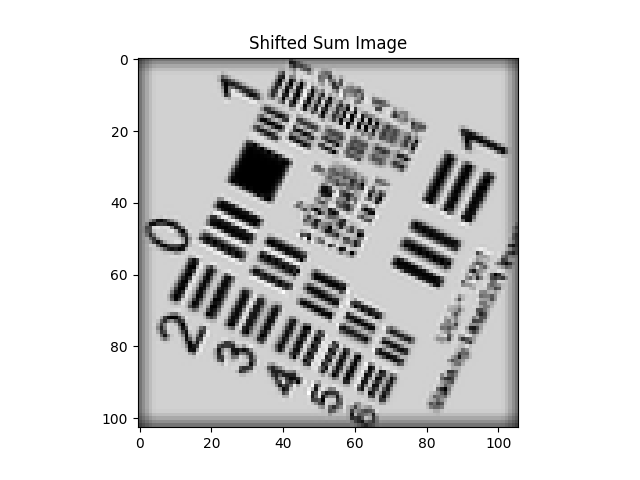

In [ ]:
plt.figure()
plt.imshow(np.abs(shifted_sum), cmap='gray')
plt.title('Shifted Sum Image')